---

**Note for running this code:** go to `Edit -> Notebook settings` and **pick T4 GPU** as the hardware accelerator.

---

# ME315: Day 6: More training methods

In this lab:

- Comparison of gradient based optimisation algorithms for learning NNs
- Implementation of commonly used regularisation methods for NNs





In [ ]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
# deep learning framework
import tensorflow as tf
from tensorflow import keras

# ML modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

---

## Dataset

We are going to use the [MNIST](https://keras.io/api/datasets/mnist/) digits classification dataset available on Keras.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at [here](https://en.wikipedia.org/wiki/MNIST_database).

In [ ]:
# load MNIST dataset from Keras
# split into training and testing samples
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# normalise into greyscale
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# data structure
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

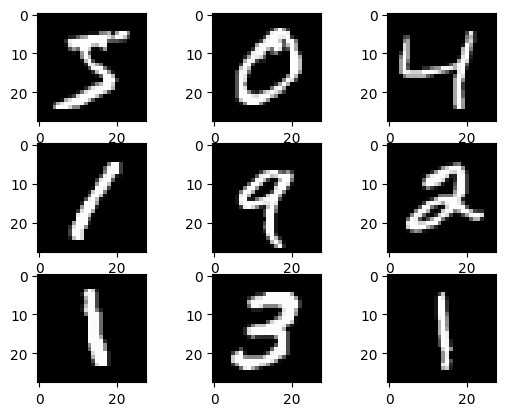

In [ ]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

---

# 1. Comparative analysis of gradient descent based algorithms

We are going to compare the following optimisation techniques:

- SGD
- Momentum
- RMS prop
- Adagrad
- Adam

We use a **grid search**-like approach to list all candidate optimisers along with standard or specific parameters.

In [ ]:
# list of optimisers to be compared
# optimizer_names = for plotting purposes
optimizer_names = ['SGD','Momentum','RMSprop','Adagrad','Adam']
# optimizer_list = methods to be tested along with any specific parameter
optimizer_list = ['SGD', keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.5, nesterov=False), 'RMSprop','Adagrad','Adam']

In [ ]:
# training steps
# here we use 5 epochs just for demonstration
n_epochs = 5

---

### Neural network (NN) model

We start with a **baseline model** and test it with all the optimisers.

**Activity**

Define the NN with the following layers:

* input layer: the 28x28 pixel image is flattened
* 1st hidden layer: dense layer with 128 units. Use the ReLU activation
* Output layer: dense layer. Decide on the number of units for this layer. Use softmax activation.

Initialise the hidden and output layer using He Normal.







In [ ]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
def build_compile(optimizer_name='SGD'):

    # Write down a 1-hidden layer ANN classification for this problem using the Keras Squential API.
    # REMEMBER to check the input shape

    model = Sequential()
    # YOUR CODE

    # compile the model with a cross-entropy loss and specify the given optimizer
    model.compile(optimizer=optimizer_name,
                  loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

    # summary of your model
    #model.summary()
    return model

In [ ]:
# Two arrays for training and validation performance
hist_acc_nn = []
hist_val_acc_nn = []
hist_loss_nn = []
hist_val_loss_nn = []

start = time.time()

# Iterate over optimizers and train the network, using x_test and y_test as a validation set in each epoch
for item, name in zip(optimizer_list, optimizer_names):
    print("-----------------------------")
    print("Doing %s optimizer" %str(name))
    print("-----------------------------")

    # Get the model from our function above
    model = build_compile(optimizer_name=item)


    # Train the model
    history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(x_test, y_test))

    # Store the performance
    hist_acc_nn.append(history.history['accuracy'])
    hist_val_acc_nn.append(history.history['val_accuracy'])
    hist_loss_nn.append(history.history['loss'])
    hist_val_loss_nn.append(history.history['val_loss'])

    print("-----------------------------")

end = time.time()
time_nn = (end-start) / 60
print('minutes to run: ', time_nn)

In [ ]:
# summarize history for accuracy on training set
for i in range(len(optimizer_list)):
    plt.plot(hist_loss_nn[i],'-o',label=str(optimizer_names[i]))
plt.title('model loss on train 1 hidden layer NN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# summarize history for accuracy on test set
for i in range(len(optimizer_list)):
    plt.plot(hist_val_loss_nn[i],'-o', label=str(optimizer_names[i]))
plt.title('model loss on test 1 hidden layer NN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

---

# 2. Regularisation methods

We already know about regularisation and how it can the model to minimise overfitting.

**Activity**

Add L2 regularisation to your baseline model of Section 1 and run the training again. To add the regularisation add the parameter:

kernel_regularizer=keras.regularizers.l2(<positive_value>)

and set <positive_value> to 0.0001



In [ ]:
# Build the model with an L2 regularization added to all weights

model_l2 = Sequential()
# YOUR CODE

# compile the model with a cross-entropy loss and specify the given optimizer
model_l2.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:
# Fit the model to the data while providing a validation set for each epoch
start = time.time()

history_l2 = model_l2.fit(x_train, y_train, epochs=n_epochs, validation_data=(x_test, y_test))

end = time.time()
time_l2 = (end-start) / 60
print('minutes to run: ', time_l2)

---

### Dropout

We can now add some **Dropout layers** to our model as another optimisation technique.

As a reference, see Figures 4 and 9 [here](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf), and Appendix A.



In [ ]:
# Build the model with dropout layer and p=0.2
# The architecture is the same of the first ANN, but you should add a dropout layer
# https://keras.io/api/layers/regularization_layers/dropout/

model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=(28, 28))),
model_dropout.add(keras.layers.Dropout(0.3)),
model_dropout.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.HeNormal())),
model_dropout.add(keras.layers.Dropout(0.3)),
model_dropout.add(Dense(10, activation='softmax', kernel_initializer=keras.initializers.HeNormal()))

# summary of your model
#model_dropout.summary()

# Compile the model and optimize with adam
model_dropout.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
# Fit the model to the data while providing a validation set for each epoch
start = time.time()

history_dropout = model_dropout.fit(x_train, y_train, epochs=n_epochs, validation_data=(x_test, y_test))# YOUR CODE

end = time.time()
time_dropout = (end-start) / 60
print('minutes to run: ', time_dropout)

**Activity**

Build a MLP model with dropout 0.8

In [ ]:
# Build the model with dropout 0.8

model_dropout_8 = Sequential()
# YOUR CODE


# Compile the model and optimize with adam
# YOUR CODE


# Fit the model to the data while providing a validation set for each epoch
start = time.time()

history_dropout_8 = model_dropout_8.fit(x_train, y_train, epochs=n_epochs, validation_data=(x_test, y_test))

end = time.time()
time_dropout = (end-start) / 60
print('minutes to run: ', time_dropout)

---

### Early stopping

**Early stopping** is another optimisation technique that interrupts the training when no progress is observed.



In [ ]:
# Build the model with early stopping

model_es = Sequential()
model_es.add(Flatten(input_shape=(28, 28))),
model_es.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.HeNormal()))
model_es.add(Dense(10, activation='softmax', kernel_initializer=keras.initializers.HeNormal()))
# summary of your model
model_es.summary()

# Compile the model and optimize with adam
model_es.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

# Specifiy your early stopping monitor
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                   patience=4)

In [ ]:
from os import times_result
# Fit the model to the data while providing a validation set for each epoch
# REMEMBER to add the early stopping monitor within the callbacks argument
start = time.time()

history_es = model_es.fit(x_train, y_train, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[es])

end = time.time()
time_es = (end-start) / 60
print('minutes to run: ', time_es)

### Comparison among regularisation methods

In [ ]:
# summarize history for training loss
plt.plot(hist_loss_nn[-1],'-o', label='No regularisation')
plt.plot(history_l2.history['loss'],'-o', label="L2")
plt.plot(history_es.history['loss'],'-o', label="Early Stopping")
plt.plot(history_dropout.history['loss'],'-o', label="Dropout 0.3")
plt.plot(history_dropout_8.history['loss'],'-o', label="Dropout 0.8")
plt.title('model loss on train')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# summarize history for testing loss
plt.plot(hist_val_loss_nn[-1],'-o', label='No regularisation')
plt.plot(history_l2.history['val_loss'],'-o', label="L2")
plt.plot(history_es.history['val_loss'],'-o', label="Early Stopping")
plt.plot(history_dropout.history['val_loss'],'-o', label="Dropout 0.3")
plt.plot(history_dropout_8.history['val_loss'],'-o', label="Dropout 0.8")
plt.title('model loss on test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# summarize history for training accuracy
plt.plot(hist_acc_nn[-1],'-o', label='No regularisation')
plt.plot(history_l2.history['accuracy'],'-o', label="L2")
plt.plot(history_es.history['accuracy'],'-o', label="Early Stopping")
plt.plot(history_dropout.history['accuracy'],'-o', label="Dropout 0.3")
plt.plot(history_dropout_8.history['accuracy'],'-o', label="Dropout 0.8")
plt.title('model accuracy on train')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# summarize history for testing accuracy
plt.plot(hist_val_acc_nn[-1],'-o', label='No regularisation')
plt.plot(history_l2.history['val_accuracy'],'-o', label="L2")
plt.plot(history_es.history['val_accuracy'],'-o', label="Early Stopping")
plt.plot(history_dropout.history['val_accuracy'],'-o', label="Dropout 0.3")
plt.plot(history_dropout_8.history['val_accuracy'],'-o', label="Dropout 0.8")
plt.title('model accuracy on testing')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()